<a href="https://colab.research.google.com/github/srikant-ai/Deep_Learning_TensorFlow/blob/main/Introduction_to_Computer_Vision_With_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Convolutional Nueral Network and Computer Vision with Tensoflow

##### Get the Data

The Images we're working with are from Food101 dataset (101 different classes of food) : https://www.kaggle.com/dansbecker/food-101

However i have modified it only use use two classes (pizza & Steak) using the data modification notebook.

In [1]:
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-08-22 10:45:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   111MB/s    in 0.9s    

2021-08-22 10:45:54 (111 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
#  Unzip the Downloaded Zip File 

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


##### Inspect the data (become one with it)

* A Very Crucial Step at the begging of any machine learning project is becoming one with data.

* And for a computer vision project... this usually means visuzlizing many samples of your data.

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os 

# Walk through the pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"These are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

These are 2 directories and 1 images in 'pizza_steak'.
These are 2 directories and 1 images in 'pizza_steak/test'.
These are 0 directories and 250 images in 'pizza_steak/test/pizza'.
These are 0 directories and 250 images in 'pizza_steak/test/steak'.
These are 2 directories and 1 images in 'pizza_steak/train'.
These are 0 directories and 750 images in 'pizza_steak/train/pizza'.
These are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [7]:
# The Extra File in our pizza_Steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Aug 22 10:45 .
drwxr-xr-x 1 root root 4096 Aug 22 10:45 ..
-rw-r--r-- 1 root root 6148 Aug 22 10:45 .DS_Store
drwxr-xr-x 4 root root 4096 Aug 22 10:45 test
drwxr-xr-x 4 root root 4096 Aug 22 10:45 train


#### To Visualize our images, first let's ge the class names programmatically

In [8]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
# Create a List of Class Name from Subdirectories
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names=class_names[1:]
print(class_names)

['pizza' 'steak']


In [9]:
# Lets Visualize our Images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory (we'll view images from here)
  target_folder=target_dir+"/"+target_class
  # Get a Random image path
  random_image = random.sample(os.listdir(target_folder),1)
  #print(random_image)
  # Read in the image and Plot it using matplotlib
  img =mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  # Show the shape of the image
  print(f"Image Shape : {img.shape}") 

  return img


Image Shape : (512, 384, 3)


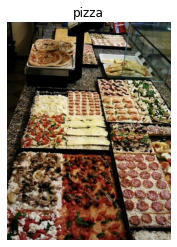

In [10]:
# View random Pizza image from training data
img=view_random_image(target_dir='pizza_steak/train',
                  target_class='pizza')

Image Shape : (384, 512, 3)


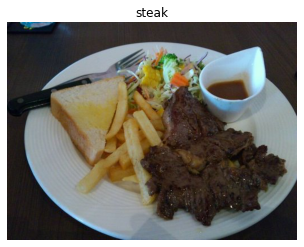

In [11]:
# View random Steak image from training data
img=view_random_image(target_dir='pizza_steak/train',
                  target_class='steak')

In [12]:
img.dtype

dtype('uint8')

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[38, 41, 46],
        [42, 45, 50],
        [38, 41, 46],
        ...,
        [50, 38, 50],
        [51, 37, 50],
        [51, 37, 50]],

       [[39, 42, 49],
        [37, 40, 47],
        [32, 35, 42],
        ...,
        [48, 36, 46],
        [48, 36, 46],
        [49, 35, 48]],

       [[38, 41, 50],
        [32, 35, 44],
        [26, 29, 38],
        ...,
        [46, 35, 41],
        [47, 36, 44],
        [48, 37, 45]],

       ...,

       [[31, 21, 20],
        [32, 22, 21],
        [29, 19, 20],
        ...,
        [22, 16, 26],
        [24, 18, 28],
        [23, 17, 27]],

       [[32, 22, 21],
        [31, 21, 20],
        [27, 17, 18],
        ...,
        [25, 19, 29],
        [29, 21, 32],
        [29, 21, 32]],

       [[31, 21, 20],
        [29, 19, 18],
        [24, 14, 15],
        ...,
        [27, 19, 30],
        [31, 23, 34],
        [33, 25, 36]]], dtype=uint8)>

In [14]:
img.shape # Gives Width, Height and Colour Channels

(384, 512, 3)

**Note** : Machine Learning Models/Deep Learning Models prefer to work with values between 0 or 1. Knowing this , One of the Common Preprocessing steps for working with images is to scaler (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value). 

In [15]:
# Get all the Pixel values between 0 & 1
img/255

array([[[0.14901961, 0.16078431, 0.18039216],
        [0.16470588, 0.17647059, 0.19607843],
        [0.14901961, 0.16078431, 0.18039216],
        ...,
        [0.19607843, 0.14901961, 0.19607843],
        [0.2       , 0.14509804, 0.19607843],
        [0.2       , 0.14509804, 0.19607843]],

       [[0.15294118, 0.16470588, 0.19215686],
        [0.14509804, 0.15686275, 0.18431373],
        [0.1254902 , 0.1372549 , 0.16470588],
        ...,
        [0.18823529, 0.14117647, 0.18039216],
        [0.18823529, 0.14117647, 0.18039216],
        [0.19215686, 0.1372549 , 0.18823529]],

       [[0.14901961, 0.16078431, 0.19607843],
        [0.1254902 , 0.1372549 , 0.17254902],
        [0.10196078, 0.11372549, 0.14901961],
        ...,
        [0.18039216, 0.1372549 , 0.16078431],
        [0.18431373, 0.14117647, 0.17254902],
        [0.18823529, 0.14509804, 0.17647059]],

       ...,

       [[0.12156863, 0.08235294, 0.07843137],
        [0.1254902 , 0.08627451, 0.08235294],
        [0.11372549, 0

### An end-to-end example 

Let's build a convolutional nueral network to find pattern's in our images, more specifically we need a way to :

* Load our images 
* Preprocess our images 
* Build a CNN to find patterns in our images 
* Compile our CNN 
* Fit the CNN to our training data 


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed 
tf.random.set_seed(42)

# preprocessing the data (get all of the pizel values between 0 & 1, also called as scaling/Normalizing)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#setup paths to our data directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

# Build a CNN Model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(filters=10,
                                     kernel_size=3,
                                     activation="relu",
                                     input_shape=(224,224,3)),
              tf.keras.layers.Conv2D(10,3,activation="relu"),
              tf.keras.layers.MaxPool2D(pool_size=2,
                                        padding="valid"),
              tf.keras.layers.Conv2D(10,3,activation="relu"),
              tf.keras.layers.Conv2D(10,3,activation="relu"),
              tf.keras.layers.MaxPool2D(pool_size=2,
                                        padding="valid"),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])

# Compile our CNNN Model
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 200ms/step - loss: 0.5691 - accuracy: 0.6800 - val_loss: 0.4168 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4131 - accuracy: 0.8233 - val_loss: 0.3569 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3842 - accuracy: 0.8233 - val_loss: 0.3104 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3465 - accuracy: 0.8513 - val_loss: 0.3191 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3299 - accuracy: 0.8640 - val_loss: 0.3399 - val_accuracy: 0.8620


In [17]:
# Get a model Summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [18]:
#set the random seed
tf.random.set_seed(42)

# Create a model to replicate tensordflow playground model
model_2=tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(224,224,3)),
        tf.keras.layers.Dense(4,activation='relu'),
        tf.keras.layers.Dense(4,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
])
# Compile our CNNN Model
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 0.8794 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000


In [19]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [20]:
#set the random seed
tf.random.set_seed(42)

# Create a model to replicate tensordflow playground model
model_3=tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(224,224,3)),
        tf.keras.layers.Dense(100,activation='relu'),
        tf.keras.layers.Dense(100,activation='relu'),
        tf.keras.layers.Dense(100,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
])
# Compile our CNNN Model
model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 3.9689 - accuracy: 0.6400 - val_loss: 0.5429 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.7201 - accuracy: 0.6913 - val_loss: 0.5171 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.7015 - accuracy: 0.7160 - val_loss: 1.2143 - val_accuracy: 0.6340
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.8566 - accuracy: 0.7267 - val_loss: 0.5194 - val_accuracy: 0.7540
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.4577 - accuracy: 0.7940 - val_loss: 0.4676 - val_accuracy: 0.7760


In [21]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a Convolutional Nueral Network seeks to sort out and learn the most important patterns in an image.** So even when though these are less learnable parameters in our convulation nueral network, these are often more helpful in dechipering between different features in an image.

### Binary Classification : " Lets Break it Down"

1. Become one with the data (visualize , visualize , visualize)
2. preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model 
6. Adjust different parameters and improve the model (try tp beat our baseline)
7. Repeat until satisfied (expirement,expirement,expirement)

## 1. Become one with the data

Image Shape : (512, 512, 3)
Image Shape : (512, 512, 3)


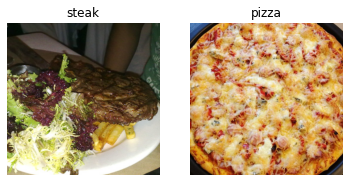

In [22]:
# Visualize the data 
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train","pizza")

##2. Preprocess the data for Modelling

In [23]:
#Define directory  dataset paths 

train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

Our Next step is to turn our data into **batches**. 

A batch is a small subset of data. Rather than look at all 1500 data points/Images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons :

1. For Larger Datapoints, might not fit into the memory of your processor.
2. Trying to learn the patterns in Large Batch of data in one Hit could result in the model not being able to learn very well.
3. Why Batch size is 32 ?  **Link :** https://arxiv.org/abs/1804.07612


In [24]:
# create Train and test Data generators and Rescale the Data 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [25]:
# load in our image data from directories and turn them into batches

train_data= train_datagen.flow_from_directory(directory=train_dir, # Target Directory of Images
                                              target_size=(224,224),  # Target Size of Images (height,width)
                                              class_mode='binary', # Type of data we are working i.e. Binary Clasification, Multiclass Classification
                                              batch_size=32) # size of minibatches


test_data= test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of a train data batch 
images , labels = train_data.next() # get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [27]:
# Number of batches in train dataset
len(train_data) # total training images / batch_size

47

In [28]:
# Get the first 2 images of first batch 
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [29]:
# View the first batch of labels 
labels 

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3. Create a CNN Classifier (start with a basiline)
A Baseline is a relatively simple model or existing result that you setup when beggining a machine learning experimenting , you try to beat the baseline.

In [30]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [31]:
# set seed
tf.random.set_seed(42)

# create the model (this model will be our baseline mode)
model_4 = Sequential([
            Conv2D(filters=10, # filters is the number of sliding windows going across an input (higher = more complex model)
                   kernel_size=3, # size of the sliding window goind across the input
                   strides=1, # the size of steps the sliding winow takes across the input
                   padding='valid', # If Padding is 'Same' The Input Shape = Output Shape else if Padding = 'Valid' Output is compressed
                   activation='relu',
                   input_shape=(224,224,3)),# Input Layer
            Conv2D(10,3,activation='relu'),
            Conv2D(10,3,activation='relu'),
            Flatten(),
            Dense(1,activation='sigmoid')  # Output layer
])


In [32]:
# compile the model
model_4.compile(loss='binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
# Get Model Summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## 4. Fit the Model

In [33]:
# check the lengths of training and test data generators 
len(train_data) , len(test_data)

(47, 16)

In [34]:
# Fit the Model
history_4 = model_4.fit(train_data, # combination of X and Y
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 0.7640 - accuracy: 0.6787 - val_loss: 0.4654 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4344 - accuracy: 0.8053 - val_loss: 0.3387 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3480 - accuracy: 0.8540 - val_loss: 0.3383 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.2560 - accuracy: 0.9067 - val_loss: 0.3897 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.1754 - accuracy: 0.9487 - val_loss: 0.3476 - val_accuracy: 0.8440


##5. Evaluating our Model

It Looks like our model Learning , lets evaluate our model

In [35]:
import pandas as pd
pd.DataFrame(history_4.history)

,loss,accuracy,val_loss,val_accuracy
0,0.764012,0.678667,0.465408,0.776
1,0.434353,0.805333,0.338702,0.846
2,0.348019,0.854000,0.338273,0.838
3,0.255953,0.906667,0.389717,0.834
4,0.175352,0.948667,0.347635,0.844


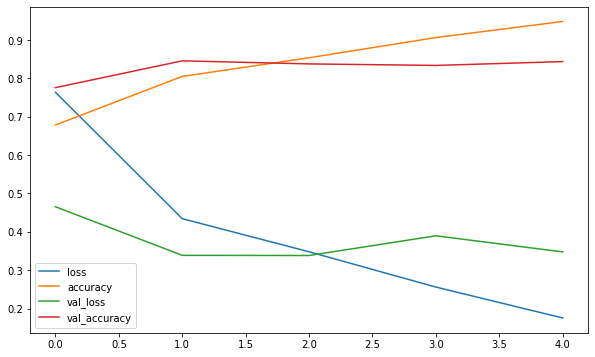

In [36]:
# Lets plot the training curves
pd.DataFrame(history_4.history).plot(figsize=(10,6))

In [37]:
def plot_loss_curves(history):
  """
  return separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(epochs , loss ,label ='training loss')
  plt.plot(epochs , val_loss ,label ='validation loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs , accuracy ,label ='training accuracy')
  plt.plot(epochs , val_accuracy ,label ='validation accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()


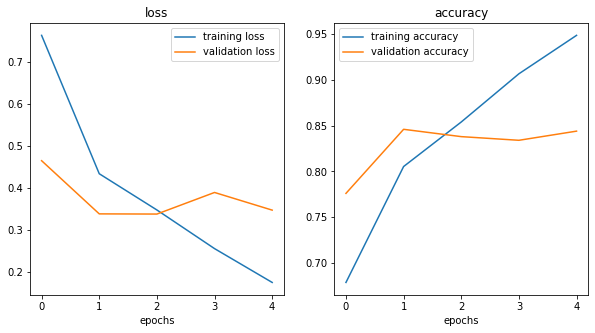

In [38]:
# check loss and accuracy of model_4
plot_loss_curves(history_4)

**Note** : When a model's **validation loss starts to increase** , its likely that the model is overfitting the training dataset. This means, its learning the patterns in the training dataset *too well* and thus the model's ability to generalize unseen data will be diminshed. 

##6. Adjust the Model Parameters 

Fitting a machine learning model comes in 3 Steps:

* Create a baseline
* Beat the Baseline Model by overfitting a larger model
* Reduce overfitting

Way to induce overfitting
* Increase the number of Conv Layers
* Increase the number of Conv Filters
* Add another another dense layer to the output of our flattened layer

Way to Reduce overfitting
* Add data augumentation 
* Add Regularization layers (such as MaxPool2D)
* Add more data...

In [39]:
# set random seed to 42
tf.random.set_seed(42)

# Create a new baseline model
model_5= Sequential([
        Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
        MaxPool2D(),
        Conv2D(10,3,activation='relu'),
        MaxPool2D(),
        Conv2D(10,3,activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(1,activation ='sigmoid')
])



In [40]:
# Compile the model
model_5.compile(loss = 'binary_crossentropy',
               optimizer=Adam(),
                metrics=['accuracy'])

In [41]:
#fit the model
history_5=model_5.fit(train_data, # combination of X and Y
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6044 - accuracy: 0.6780 - val_loss: 0.4552 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4851 - accuracy: 0.7707 - val_loss: 0.4117 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 9s 181ms/step - loss: 0.4256 - accuracy: 0.8093 - val_loss: 0.4094 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4081 - accuracy: 0.8300 - val_loss: 0.3395 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.3783 - accuracy: 0.8327 - val_loss: 0.3287 - val_accuracy: 0.8720


In [42]:
# Summary 
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

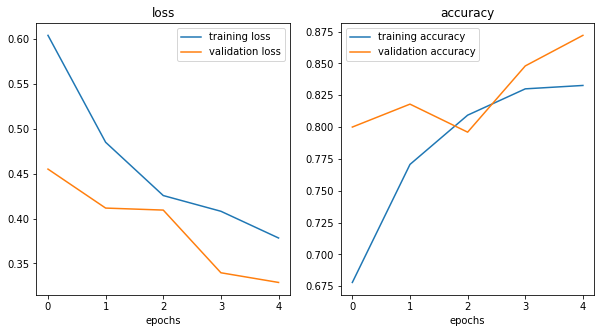

In [43]:
# check loss and accuracy of model_5
plot_loss_curves(history_5)

##### Lets Try Data Augumentation

In [44]:
#create a ImageDataGenerator training instance with data augumnetation
train_datagen_augumented = ImageDataGenerator(rescale=1./255,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              horizontal_flip=True,
                                              )

#create a ImageDataGenerator training instance without data augumnetation
train_datagen=ImageDataGenerator(rescale=1./255)

#create a ImageDataGenerator test instance without data augumnetation
test_datagen=ImageDataGenerator(rescale=1./255)

**Question :** What is Data Augumentation ?

Data Augumentation is the process of altyering our training data, leading it to have more diversity and in tuen allowing our models to learn more generilizable patterns hopefully. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.


In [45]:
# Import data and augument it from training directory 
print("Augumented training data")
train_data_augumented = train_datagen_augumented.flow_from_directory(train_dir,
                                                                     target_size=(224,224),
                                                                     batch_size=32,
                                                                     class_mode="binary",
                                                                     shuffle=False) 

# Import non augumented data from training directory 
print("Non-Augumented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

# Import data and augument it from training directory 
print("Non-Augumented Test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

Augumented training data
Found 1500 images belonging to 2 classes.
Non-Augumented training data
Found 1500 images belonging to 2 classes.
Non-Augumented Test data
Found 500 images belonging to 2 classes.


**Note :** Data Augumentation is usually only performed on the training data. Using **ImageDataGenerator** built-in data augumentation parameters our images are left as they are in directories but are modified as they are loaded into the model

In [46]:
# Get sample data batches
images, labels = train_data.next()
augumented_images, augumeted_labels = train_data_augumented.next()

showing image number : 26


(-0.5, 223.5, 223.5, -0.5)

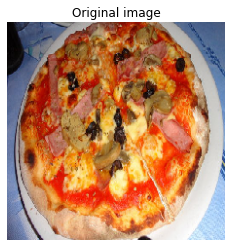

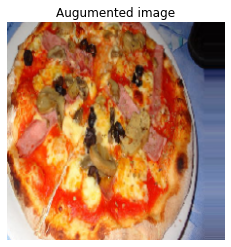

In [47]:
# Show original image and augumented image 
import random 
random_number = random.randint(0,32)
print(f"showing image number : {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augumented_images[random_number])
plt.title(f"Augumented image")
plt.axis(False)

##### Now that we have seen what agumented training data looks like, lets build a model and see how model Perfroms 

In [48]:
# Create a model same as model5 
model_6 = Sequential([
          Conv2D(10,3,activation='relu'),
          MaxPool2D(2),
          Conv2D(10,3,activation='relu'),
          MaxPool2D(2),
          Conv2D(10,3,activation='relu'),
          MaxPool2D(2),
          Flatten(),
          Dense(1,activation='sigmoid')
])

# compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model on Augumented Data
history_6 = model_6.fit(train_data_augumented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augumented),
                        validation_data=test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 466ms/step - loss: 0.7131 - accuracy: 0.4893 - val_loss: 0.6807 - val_accuracy: 0.5840
Epoch 2/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6824 - accuracy: 0.5680 - val_loss: 0.6402 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6493 - accuracy: 0.6533 - val_loss: 0.5471 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 21s 457ms/step - loss: 0.6402 - accuracy: 0.6360 - val_loss: 0.5485 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6064 - accuracy: 0.6960 - val_loss: 0.5246 - val_accuracy: 0.7480


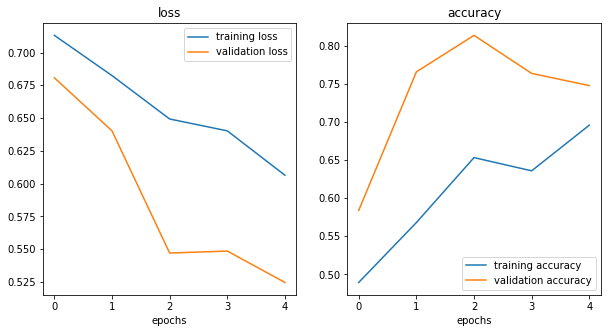

In [49]:
# Check Model Training Curves
plot_loss_curves(history_6)

In [50]:
# Import data and augument it from training directory with Shuffle as True
print("Augumented training data")
train_data_augumented = train_datagen_augumented.flow_from_directory(train_dir,
                                                                     target_size=(224,224),
                                                                     batch_size=32,
                                                                     class_mode="binary",
                                                                     shuffle=True) 

Augumented training data
Found 1500 images belonging to 2 classes.


In [51]:
# Create a model same as model5 
model_7 = Sequential([
          Conv2D(10,3,activation='relu'),
          MaxPool2D(2),
          Conv2D(10,3,activation='relu'),
          MaxPool2D(2),
          Conv2D(10,3,activation='relu'),
          MaxPool2D(2),
          Flatten(),
          Dense(1,activation='sigmoid')
])

# compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model on Augumented Data
history_7 = model_7.fit(train_data_augumented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augumented),
                        validation_data=test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6516 - accuracy: 0.6207 - val_loss: 0.6012 - val_accuracy: 0.6020
Epoch 2/5
47/47 [==============================] - 21s 455ms/step - loss: 0.5412 - accuracy: 0.7333 - val_loss: 0.3831 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 21s 453ms/step - loss: 0.5107 - accuracy: 0.7540 - val_loss: 0.4022 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 21s 454ms/step - loss: 0.4800 - accuracy: 0.7820 - val_loss: 0.4534 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4683 - accuracy: 0.7853 - val_loss: 0.3377 - val_accuracy: 0.8620


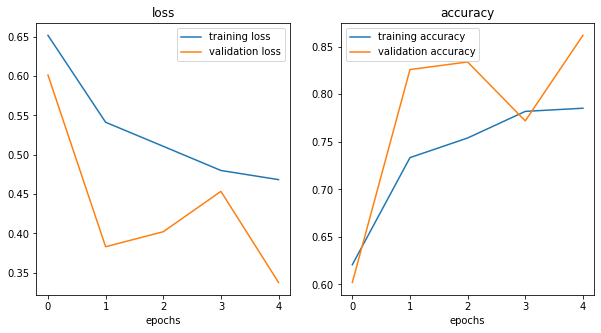

In [52]:
# Check Model Training Curves
plot_loss_curves(history_7)

**Note :** When shuffling training data, model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case,pizza & steak at the same time instead of just pizza then steak)

In [54]:
# Create a Function to import and image and resize and expand Dimension to be able to use to predict whether a image is of steak or pizza
def load_and_prep_image(filename,img_shape,model):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to 
  (1,img_length,img_width,channels).
  """
  # Read in the image 
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img,size=[img_shape,img_shape])
  # Rescale the image
  img = img/255.

  pred = tf.expand_dims(img,axis=0)

  pred= int(tf.round(model.predict(pred)))

  plt.imshow(img)
  plt.title(f"Predicted Label : {class_names[pred]}")
  plt.axis(False)




--2021-08-22 11:36:08--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg           [ <=>                ] 123.63K   683KB/s    in 0.2s    

2021-08-22 11:36:09 (683 KB/s) - ‘03-steak.jpeg’ saved [126600]



In [88]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-08-22 12:01:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2021-08-22 12:01:26 (49.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



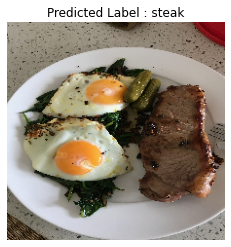

In [90]:
load_and_prep_image("03-steak.jpeg",224,model_7)

In [91]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2021-08-22 12:03:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2021-08-22 12:03:14 (59.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



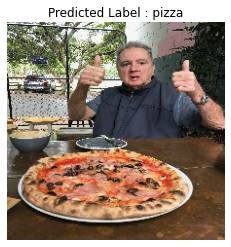

In [92]:
load_and_prep_image("03-pizza-dad.jpeg",224,model_7)